In [12]:
import mplfinance as mpf
import pandas as pd


In [15]:
color_conf = {
    'EMA_144_day': '#933974',     # 红
    'EMA_169_day': '#642640',     # 红
    'SMA_5_day': '#E7E2BB',       # 浅黄
    'SMA_10_day': '#4671D5',      # 浅蓝
    'SMA_20_day': '#44C595',      # 绿
    'SMA_50_day': '#432790',      # 紫
    'SMA_20_weekly': '#008000',   # 绿
    'SMA_50_weekly': '#432790',   # 紫
}

# 创建自定义样式
candle_stl = mpf.make_mpf_style(
    base_mpf_style='charles',  # 选择基础风格
    marketcolors=mpf.make_marketcolors(
        up='#05A964', down='#F94444',
        edge='i', wick='i', 
        volume={'up': '#05A964', 'down': '#F94444'},
        ohlc='i'  # OHLC 图的颜色
    ),
    figcolor='#101113',  # 整个图表的背景颜色
    facecolor='#101113',  # 单个轴的背景颜色
    edgecolor='#101113',  # 边框色
    gridcolor='gray',   # 网格线颜色
    gridstyle='--',
    rc={
        'text.color': '#DDDDDD',  # 设置所有文字的颜色为白色
        'xtick.color': '#DDDDDD',  # 设置x轴刻度的颜色
        'ytick.color': '#DDDDDD',  # 设置y轴刻度的颜色
        'axes.labelcolor': '#DDDDDD',  # 设置轴标签颜色
        'axes.edgecolor': '#DDDDDD',   # 设置轴的边框颜色
    },
)


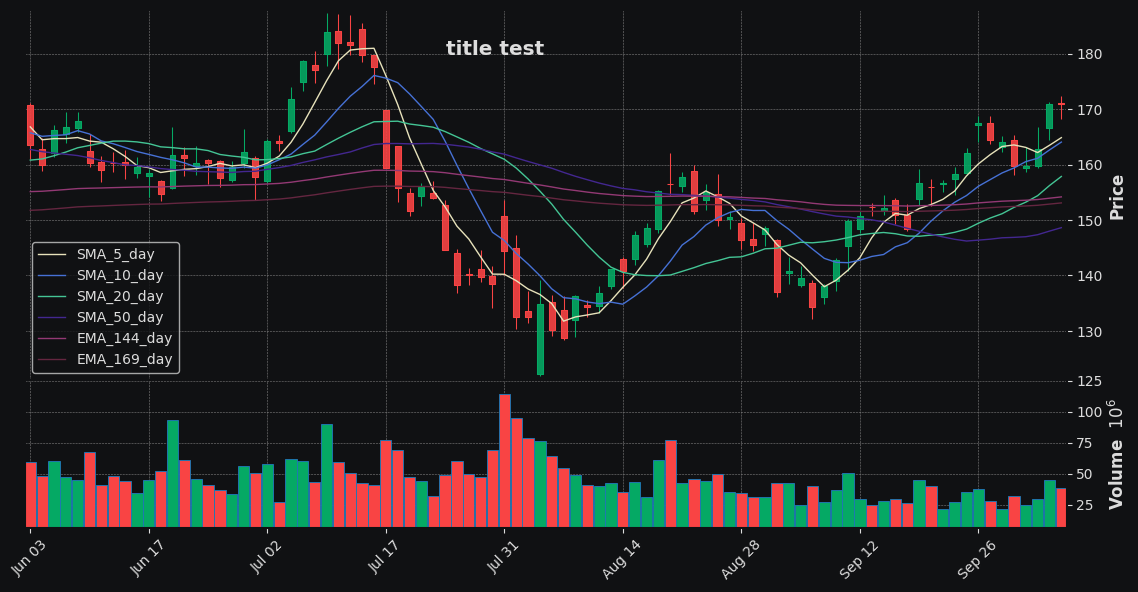

In [19]:
df = pd.read_csv('/Users/liuda/Local/data/finance/output/trigger/AMD.csv')
df = df[df['Date']>='2024-06-01']
df.index = pd.to_datetime(df["Date"])

add_plot = []
columns=["SMA_5_day", "SMA_10_day", "SMA_20_day", "SMA_50_day", "EMA_144_day", "EMA_169_day"]

for col in columns:
        linestyle = "solid"
        color = color_conf[col]
        addplot = mpf.make_addplot(df[col], linestyle=linestyle, label=col, width=1.0, color=color)
        add_plot.append(addplot)



fig, axes = mpf.plot(df, type='candle', volume=True, style=candle_stl,  # 'charles',
                         title='title test', addplot=add_plot, returnfig=True,
                         figscale=3.0, figsize=(12, 6), tight_layout=True)
